In [212]:
# plotting
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl

# data visualization
import seaborn as sns
from helper_functions import plot_setup
sns.set_style('white')
plot_setup()

# data analysis
import pandas as pd

# data mining & ML
from sklearn import preprocessing

import warnings
warnings.filterwarnings('ignore')

# Getting Started with the Data

We will be working with the [Titanic Dataset](http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic.html).

### Some Background before you Start

"The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others." -- Kaggle

In this exploration, we will complete analysis to predict which factors made individuals more or less likely to survive the Titanic. We will build up predictive machine learning models that model the likelihood of survival for an individual based on various features of this person. Then we will use these models to predict the likelihood of survival for unknown people.

### Loading and Pre-processing

Before we get started with analysis, we begin with the first part of any machine learning exploration: Loading the data and cleaning it up for analyis.

Typical datasets are messy.
* Data can, and often is missing.
* Sometimes data is invalid.
* You might have much more data available than you need.
* You may also need to change your data types, so they are compatible with your algorithms. This is just a short set of the way that data sets in the wild can be imperfect.

These data sets require preprocessing to get them into the format which a library like scikit-learn can use.

**Let's first load our data set and take a look at some of the data to get an idea of what type of preprocessing we might need.**

In [331]:
data_url = 'titanic.csv'
titanic = pd.read_csv(data_url, sep = ';')

In [332]:
titanic.head()

,pclass,survived,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,"211,3375",B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,"0,9167",1,2,113781,"151,5500",C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,"151,5500",C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,"151,5500",C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,"151,5500",C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


**Let's take a look at the columns in our data set.**

The `Survived` column is our label set (i.e. what we are trying to predict). The rest of the columns are our features.

In [333]:
titanic.columns.tolist()

['pclass',
 'survived',
 'name',
 'gender',
 'age',
 'sibsp',
 'parch',
 'ticket',
 'fare',
 'cabin',
 'embarked',
 'boat',
 'body',
 'home.dest']

#### What the columns mean:

**survived** - Survival  
0 = No, 1 = Yes

**pclass** - Ticket class (a proxy for socio-economic status)  
1st = Upper, 2nd = Middle, 3rd = Lower

**gender** - Gender  
female, male

**age** - Age in years  
Fractional if less than 1. If the age is estimated, it is in the form of xx.5

**sibsp** - # of siblings/spouses aboard the Titanic  
Sibling = brother, sister, stepbrother, stepsister  
Spouse = husband, wife (only official, legal wives considered)

**parch** - # of parents/children aboard the Titanic  
Parent = mother, father  
Child = daughter, son, stepdaughter, stepson  
Some children travelled only with a nanny, therefore parch=0 for them.

**ticket** - Ticket number

**fare** - Passenger fare

**cabin** - Cabin number

**embarked** - Port of Embarkation  
C = Cherbourg, Q = Queenstown, S = Southampton

Let's take another look at a small sample of the data.

In [334]:
titanic.head()

,pclass,survived,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,"211,3375",B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,"0,9167",1,2,113781,"151,5500",C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,"151,5500",C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,"151,5500",C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,"151,5500",C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


**What are some good places to start with cleaning up this data?**

1) In the `age` and `fare` columns, we see that commas are used rather than periods. We need to replace all commas in those columns with periods so we can work with them properly.

In [335]:
titanic["age"].replace(',', '.', inplace = True, regex = True)
titanic["fare"].replace(',', '.', inplace = True, regex = True)

titanic.head(2)

,pclass,survived,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"


2) When the dataset was first loaded, some of the numeric types, like `age` were actually stored and loaded as object types. We need to convert these into numeric types for scikit-learn to use. Note that python `string` data types show up as `object` in pandas.

Let's see what types are in our data set and make sure they match our expectations.

In [336]:
for col in titanic.columns.values:
    print(col, titanic[col].dtype)

pclass int64
survived int64
name object
gender object
age object
sibsp int64
parch int64
ticket object
fare object
cabin object
embarked object
boat object
body float64
home.dest object


Which of the column types don't match the expected types?

We expect `age` and `fare` to be numeric, but they are currently `object` types. Everything else looks as expected.

Let's convert those columns.

In [337]:
titanic[['age', 'fare']] = titanic[['age', 'fare']].apply(pd.to_numeric)

**Adding Features**

We don't have to just remove and reformat columns during pre-processing, though!

We can also create new features that we think may be useful.

The total family size of an individual could be a useful feature for us. Let's create a new feature, `family_members` out of `sibsp` (the number of siblings and spouses) and `parch` (the number of parent and children).

We'll also create the `family_status` feature which tells us if an individual traveled alone or with a family.

In [338]:
titanic['family_members'] = titanic['sibsp'] + titanic['parch']

titanic['family_status'] = 'alone'
titanic['family_status'][titanic['family_members'] != 0] = 'with family'

titanic.head(2)

,pclass,survived,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,family_members,family_status
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",0,alone
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",3,with family


OK. Pre-processing done for now. Our data is ready to work well with scikit-learn and we're in a good place to move to the next step of data exploration: plotting.

# Plotting the data

The first step of machine learning is understanding the data that you are working with. This helps you get a sense of which features might be the most important, which algorithms make the most sense for your data, etc.

What do you think might distinguish the people who survived the Titanic from the ones who didn't?

Let's plot the data and see what initial insights we can get.

In [339]:
# ax = plt.gca()
# titanic['age'][titanic['survived'] == 1].hist(bins = range(0, 100, 5), alpha = 0.4, normed = True, label = 'survived')
# titanic['age'][titanic['survived'] == 0].hist(bins = range(0, 100, 5), alpha = 0.4, normed = True, label = 'did not survive')
# ax.legend()

In [340]:
# ax = plt.gca()
# titanic['fare'][titanic['survived'] == 1].hist(bins = range(0, 100, 10), alpha = 0.4, normed = True, label = 'survived')
# titanic['fare'][titanic['survived'] == 0].hist(bins = range(0, 100, 10), alpha = 0.4, normed = True, label = 'did not survive')
# plt.xlim(-10, 100)
# ax.legend()

Let's start with `age`. How does age affect people's likelihood of survival?

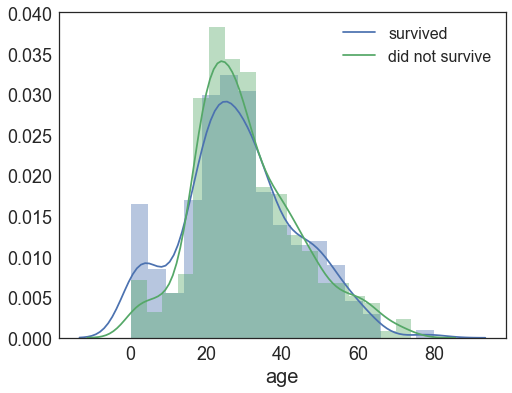

In [341]:
sns.distplot(a = titanic['age'][titanic['survived'] == 1].dropna(), kde_kws = {'label': 'survived'})
sns.distplot(a = titanic['age'][titanic['survived'] == 0].dropna(), kde_kws = {'label': 'did not survive'})

What about the price of their ticket?

[(-20, 100)]

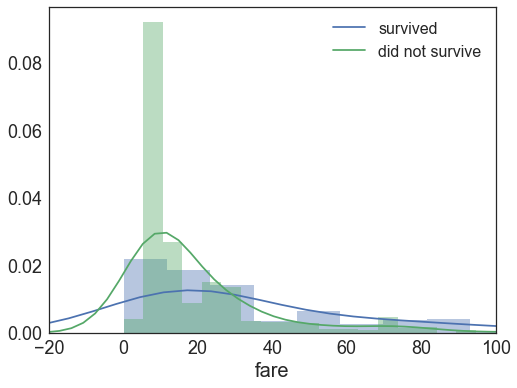

In [342]:
sns.distplot(a = titanic['fare'][titanic['survived'] == 1].dropna(), kde_kws = {'label': 'survived'})
ax = sns.distplot(a = titanic['fare'][titanic['survived'] == 0].dropna(), kde_kws = {'label': 'did not survive'})
ax.set(xlim = (-20, 100))

What else could influence whether they survived? Maybe their gender?

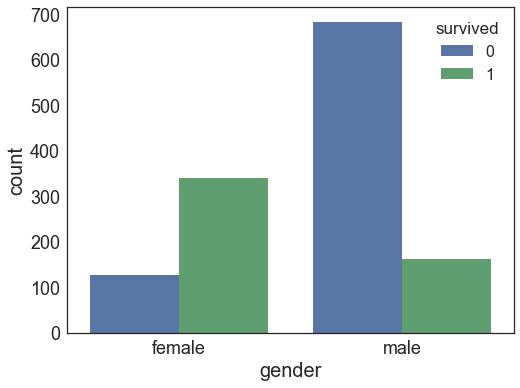

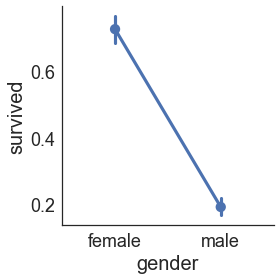

In [343]:
# Display counts of survivors for each gender category
sns.countplot(data = titanic, x = 'gender', hue = 'survived')

# Display percent of survivors for each gender category
sns.factorplot('gender', 'survived', data = titanic)

Would their passenger class have an effect?

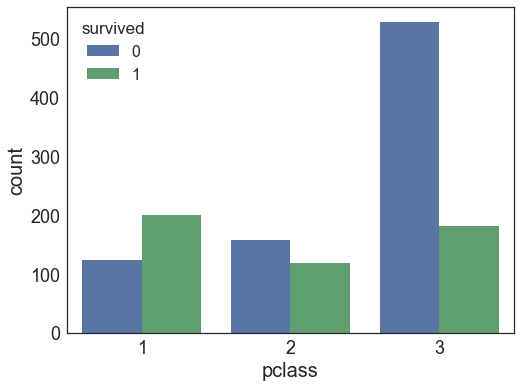

In [344]:
sns.countplot(data = titanic, x = 'pclass', hue = 'survived')

We some strong indicators in `gender` and `pclass`.

We can examine the averages of other features split on gender or pclass and see if there are any differences which stand up.

_Do you notice any other features which have very different means based on gender or pclass?_

In [345]:
titanic.groupby('gender').mean()

,pclass,survived,age,sibsp,parch,fare,body,family_members
gender,,,,,,,,
female,2.154506,0.727468,28.687071,0.652361,0.633047,46.198097,166.62500,1.285408
male,2.372479,0.190985,30.585233,0.413998,0.247924,26.154601,160.39823,0.661922


In [346]:
titanic.groupby('pclass').mean()

,survived,age,sibsp,parch,fare,body,family_members
pclass,,,,,,,
1,0.619195,39.159918,0.436533,0.365325,87.508992,162.828571,0.801858
2,0.429603,29.506705,0.393502,0.368231,21.179196,167.387097,0.761733
3,0.255289,24.816367,0.568406,0.400564,13.302889,155.818182,0.968970


Now let's look at how the combination of gender and passenger class influences the survival rates.

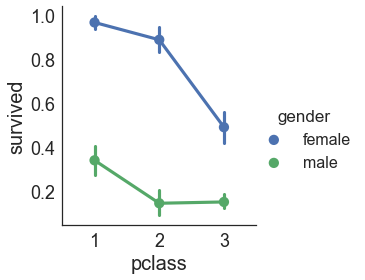

In [347]:
sns.factorplot('pclass', 'survived', hue = 'gender', data = titanic.sort_values(by = 'pclass'))

We divided people into those traveling alone or with family. How did that affect whether they ended up surviving?

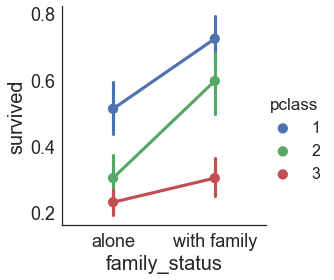

In [348]:
sns.factorplot('family_status', 'survived', hue = 'pclass', data = titanic.sort_values(by = 'family_members'))

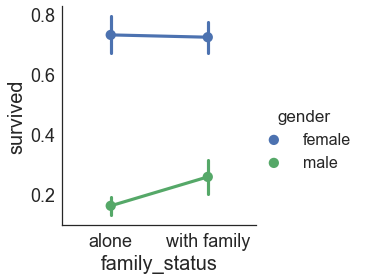

In [349]:
sns.factorplot('family_status', 'survived', hue = 'gender', data = titanic.sort_values(by = 'family_members'))

On Your Own: Explore and plot at least one other feature or combination of features you think may be an indicator of survival rate

In [350]:
### Code Here



# Preparing the data

After the initial exploration, are there any columns you think we can remove?

Let's look at two options:

* Columns with mostly unique values - If most values are unique, we won't be able to discover patterns and have enough information to generalize.  
* Columns with lots of missing values - If most values are missing, we won't have enough data to get predictive power.

1) Do we have any columns with almost all unique values?

In [354]:
sorted([(col, titanic[col].unique().size) for col in titanic.columns.values ], key=lambda tup: tup[1], reverse=True)

[('name', 1307),
 ('ticket', 929),
 ('home.dest', 370),
 ('fare', 282),
 ('cabin', 187),
 ('body', 122),
 ('age', 99),
 ('boat', 28),
 ('family_members', 9),
 ('parch', 8),
 ('sibsp', 7),
 ('embarked', 4),
 ('pclass', 3),
 ('survived', 2),
 ('gender', 2),
 ('family_status', 2)]

The majority of `name` and `ticket` fields are unique. We'll drop those columns as they are unlikely to provide us much useful information.

In [355]:
titanic.drop(['name', 'ticket'], axis = 1, inplace = True)

2) Do we have all values available for all passengers?

In [356]:
column_counts = titanic.count()
column_counts.sort()

column_counts

body               121
cabin              295
boat               486
home.dest          745
age               1046
embarked          1307
fare              1308
pclass            1309
survived          1309
gender            1309
sibsp             1309
parch             1309
family_members    1309
family_status     1309
dtype: int64

Some of the columns have significantly fewer values that others. Since machine learning models don't deal with missing values well, we'll remove these columns.

In [357]:
titanic.drop(['cabin', 'boat', 'body', 'home.dest'], axis = 1, inplace = True)

Now age is the column remaining with most missing values. Because we saw that age influences survival rates some, we don't want to exclude the age, so we'll just remove all of the missing values in the rest of the dataframe.

In [358]:
titanic.dropna(inplace = True)

And now instead of 1309, we have 1043 rows. We lost about 20% of the data which isn't ideal, but also not that bad. It is much better than holding on to the `home.dest` column and losing (43% of our data set).

In [359]:
titanic.count()

pclass            1043
survived          1043
gender            1043
age               1043
sibsp             1043
parch             1043
fare              1043
embarked          1043
family_members    1043
family_status     1043
dtype: int64

Let's look at what kind of data we have left in the dataframe. 

In [360]:
titanic.head()

,pclass,survived,gender,age,sibsp,parch,fare,embarked,family_members,family_status
0,1,1,female,29.0000,0,0,211.3375,S,0,alone
1,1,1,male,0.9167,1,2,151.5500,S,3,with family
2,1,0,female,2.0000,1,2,151.5500,S,3,with family
3,1,0,male,30.0000,1,2,151.5500,S,3,with family
4,1,0,female,25.0000,1,2,151.5500,S,3,with family


#### Different Data Types & Encoding

There are three different types of data: numerical, categorical, and ordinal.

*Numerical data* types of typically measurements and also refered to as quantitative data.

*Categorical data* represents characteristics. They can take on numerical values (e.g. 0 for Female and 1 for Male), but these numerical values don't have a mathematical sense. They can't be added together for example.

*Ordinal data* represents a mix of categorical and numerical data. The data falls into categories, but the numbers have mathematical meaning and they can be placed in an order. Star ratings (e.g. 0 - 5) are an example of ordinal data.

In our data set we have numerical and categorical data.

`age` and `fare` are examples of numerical data from our data set.

`pclass` is an example of categorical data. It uses a numerical value, though, taking values 1, 2, and 3.
`gender` is also categorical. Right now it is a string, but it refers to a category (Female or Male).
`embarked` and `family_status` are also these variables.

Machine learning models can work with numerical data with little change. However, in order for these models to work with categorical data properly, we need to encode them as numerical values. 

We will use the [`LabelEncoder`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) from `sklearn`.

This encoder converts string categorical data into numerical values, which sklearn can use, using a method which you don't need to worry about now called [One-Hot encoding](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html).

In [363]:
label_encoder = preprocessing.LabelEncoder()

titanic['gender'] = label_encoder.fit_transform(titanic['gender'])
titanic['embarked'] = label_encoder.fit_transform(titanic['embarked'])
titanic['family_status'] = label_encoder.fit_transform(titanic['family_status'])

In [364]:
titanic.head()

,pclass,survived,gender,age,sibsp,parch,fare,embarked,family_members,family_status
0,1,1,0,29.0000,0,0,211.3375,2,0,0
1,1,1,1,0.9167,1,2,151.5500,2,3,1
2,1,0,0,2.0000,1,2,151.5500,2,3,1
3,1,0,1,30.0000,1,2,151.5500,2,3,1
4,1,0,0,25.0000,1,2,151.5500,2,3,1


Look how clean our data set is. It's ready for use in our models. Let's save this cleaned data set for later use.

In [365]:
titanic.to_csv('titanic_processed.csv', index = False)

Remeber, cleaning data is a critical part of machine learning. It can take a while, but it's incredibly important. Real data is messy, and it takes some systematic run throughs of your data to get it to a good state to start working with models and algorithms.